In [1]:
import numpy as np
import matplotlib.pyplot as plt
import opart_k_segments
import opart_lda

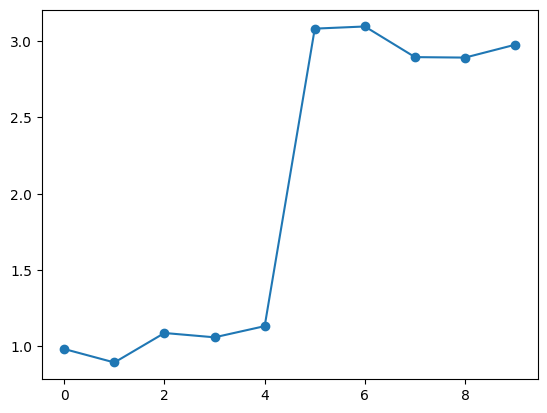

In [2]:
# template vector
values = [1, 3]
segment_length = 10 // 2
noise_strength = 0.1

sequence = np.concatenate([
    np.full(segment_length, value) + np.random.normal(0, noise_strength, segment_length) 
    for value in values
])

plt.plot(sequence, marker='o')

In [3]:
def get_mean(sequence, chpnt):
    mean = np.zeros(len(sequence))
    chpnt = np.append(chpnt, len(sequence)-1)
    chpnt = np.append(-1, chpnt)
    chpnt = chpnt + 1
    for i in range(len(chpnt)-1):
        mean[chpnt[i]:chpnt[i+1]] = np.mean(sequence[chpnt[i]:chpnt[i+1]])
    return mean

In [4]:
def plot_chpnt(sequence, chpnt):
    mean = get_mean(sequence, chpnt)
    
    plt.plot(mean)
    plt.plot(sequence, marker='o')

    # Add vertical lines at positions in chpnt
    for position in chpnt:
        plt.axvline(x=position + 0.5, color='red', linestyle='--', label='Changepoint' if position == chpnt[0] else "")

    plt.legend()
    plt.show()

### FROM K SEGMENTS

In [5]:
chpnt = opart_k_segments.opart(sequence, 2)

In [6]:
chpnt

array([4], dtype=int64)

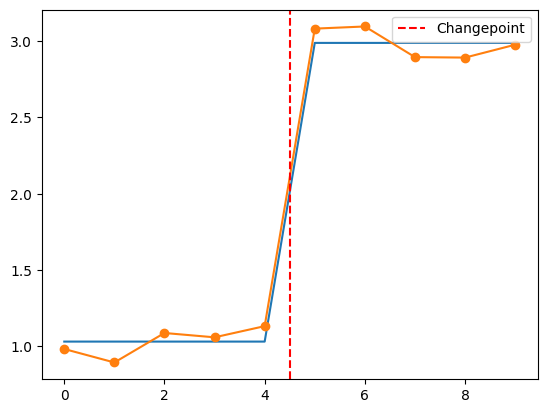

In [7]:
plot_chpnt(sequence, chpnt)

### FROM LAMBDA

In [8]:
chpnt = opart_lda.opart(sequence, 5)

In [9]:
chpnt

array([4])

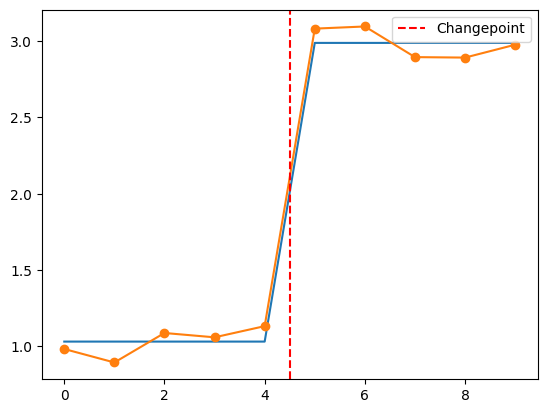

In [10]:
plot_chpnt(sequence, chpnt)